In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
Kenyon_game = pd.read_csv("Game 16 Kenyon.xlsx - Kenyon.csv")

In [3]:
Kenyon_full = Kenyon_game[Kenyon_game['Split Name']== 'game']
Kenyon_full

,Session Title,Player Name,Minutes Played,Split Name,Duration,Player Name.1,Distance (miles),Player Name.2,Sprint Distance (yards),Player Name.3,...,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s,Unnamed: 101,Unnamed: 102,Player Name.5
0,Kenyon,H,62.0,game,5536,H,4.3338,H,242.0,H,...,24,11,0,188,90,47,21,68.0,68.0,H
1,Kenyon,S,90.0,game,5536,S,5.9037,S,312.0,S,...,49,21,0,255,140,54,26,80.0,80.0,S
2,Kenyon,N,13.0,game,5536,N,1.2442,N,78.0,N,...,13,0,0,50,34,4,3,7.0,7.0,N
3,Kenyon,K,90.0,game,5536,K,4.7999,K,231.0,K,...,34,10,0,201,100,35,10,45.0,45.0,K
4,Kenyon,F,59.0,game,3662,F,1.8833,F,2.0,F,...,8,1,0,67,16,4,6,10.0,10.0,F
5,Kenyon,E,0.0,game,5536,E,0.0349,E,0.0,E,...,0,0,0,0,0,0,0,0.0,NaN,E
6,Kenyon,Z,18.0,game,5536,Z,1.8160,Z,21.0,Z,...,10,1,0,74,65,21,9,30.0,30.0,Z
7,Kenyon,R,90.0,game,5536,R,6.1884,R,552.0,R,...,33,7,0,224,119,60,24,84.0,84.0,R
8,Kenyon,X,31.0,game,5536,X,0.8943,X,1.0,X,...,4,1,0,22,10,5,1,6.0,6.0,X
9,Kenyon,C,90.0,game,5536,C,6.8826,C,208.0,C,...,56,5,0,370,156,61,23,84.0,84.0,C


In [4]:
Kenyon_volume_intensity = Kenyon_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [5]:
Kenyon_cluster = Kenyon_volume_intensity.loc[:, Kenyon_volume_intensity.columns != 'Player Name']

In [6]:
Kenyon_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Kenyon_cluster)
    Kenyon_distortions.append(kmeanModel.inertia_)

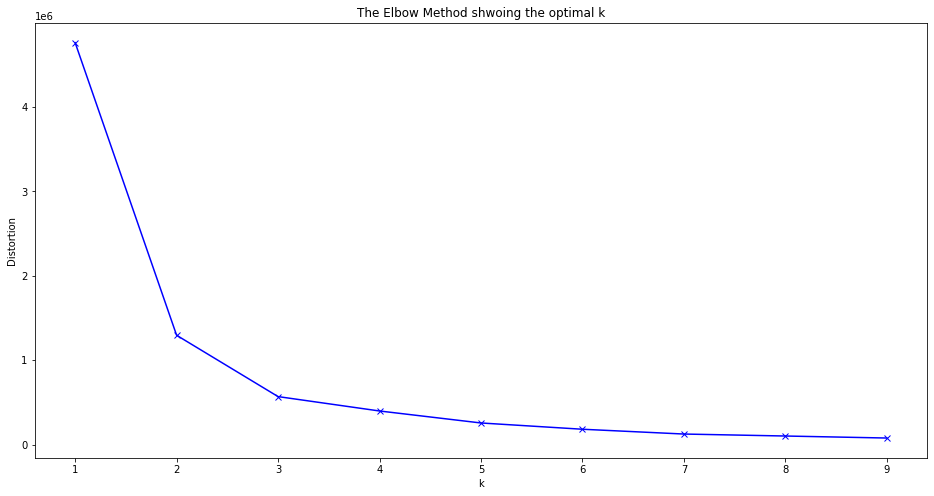

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, Kenyon_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [8]:
x_Kenyon = Kenyon_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Kenyon)
X_norm = pd.DataFrame(x_scaled)

In [9]:
Kenyon_pca = PCA(n_components = 2) # 2D PCA for the plot
reduced_Kenyon = pd.DataFrame(Kenyon_pca.fit_transform(X_norm))

In [10]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Kenyon)
# get the cluster labels
labels = kmeans.predict(reduced_Kenyon)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Kenyon_names = Kenyon_full['Player Name']

In [11]:
reduced_Kenyon['cluster'] = clusters
reduced_Kenyon['names'] = Kenyon_names
reduced_Kenyon.columns = ['x', 'y', 'cluster', 'names']
reduced_Kenyon.head()

,x,y,cluster,names
0,0.466192,-0.196342,1,H
1,1.150205,-0.055447,2,S
2,-0.753829,-0.209040,0,N
3,0.651509,-0.118708,1,K
4,-0.500960,0.056852,0,F


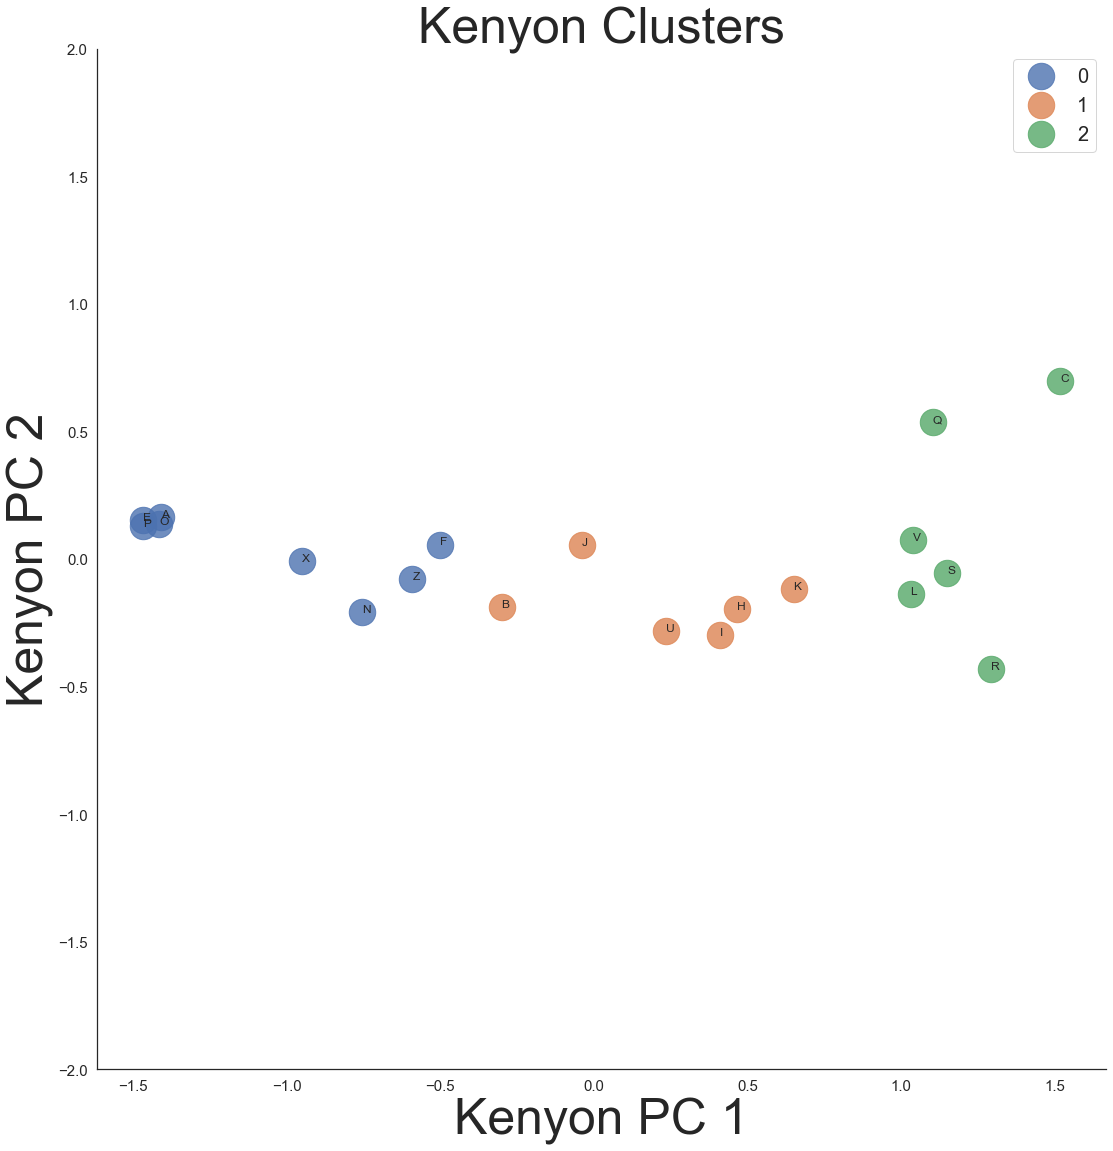

In [22]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Kenyon, legend= False,
fit_reg=False, height = 15, scatter_kws={"s": 700})
texts = []
for x, y, s in zip(reduced_Kenyon.x, reduced_Kenyon.y, reduced_Kenyon.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Kenyon PC 1", fontsize = 50)
plt.ylabel("Kenyon PC 2", fontsize = 50)
plt.title('Kenyon Clusters', fontsize=50)
plt.legend(fontsize = 20)
plt.show()

In [13]:
Kenyon_group_0 = reduced_Kenyon[(reduced_Kenyon['cluster'] == 0)]
Kenyon_group_0
#Positions: N(F) F(GK) E(MF) Z(F) X(GK) O(F) P(F) A(D)

,x,y,cluster,names
2,-0.753829,-0.209040,0,N
4,-0.500960,0.056852,0,F
5,-1.467121,0.153629,0,E
6,-0.591014,-0.077317,0,Z
8,-0.951629,-0.009662,0,X
11,-1.414983,0.137105,0,O
12,-1.467254,0.130780,0,P
13,-1.410332,0.164785,0,A


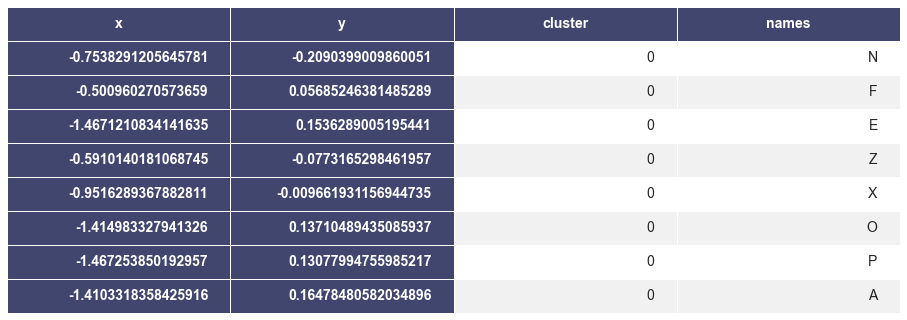

In [23]:
import six
df = Kenyon_group_0


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [14]:
Kenyon_group_1 = reduced_Kenyon[(reduced_Kenyon['cluster'] == 1)]
Kenyon_group_1
#Postions: H(F) K(D) J(F) B(F) U(MF) I(F)

,x,y,cluster,names
0,0.466192,-0.196342,1,H
3,0.651509,-0.118708,1,K
10,-0.039222,0.054029,1,J
14,-0.299839,-0.188095,1,B
16,0.235234,-0.282862,1,U
17,0.411290,-0.298587,1,I


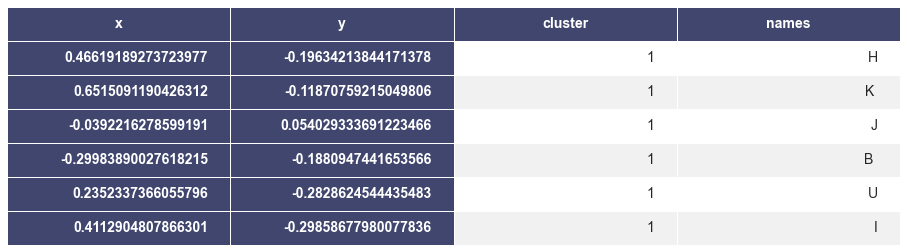

In [24]:
df = Kenyon_group_1


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [15]:
Kenyon_group_2 = reduced_Kenyon[(reduced_Kenyon['cluster'] == 2)]
Kenyon_group_2
#Positions: S(MF) R(D) C(MF) Q(MF) V(MF) L(D)

,x,y,cluster,names
1,1.150205,-0.055447,2,S
7,1.292373,-0.431867,2,R
9,1.517725,0.697926,2,C
15,1.102053,0.535888,2,Q
18,1.039387,0.073762,2,V
19,1.030215,-0.136829,2,L


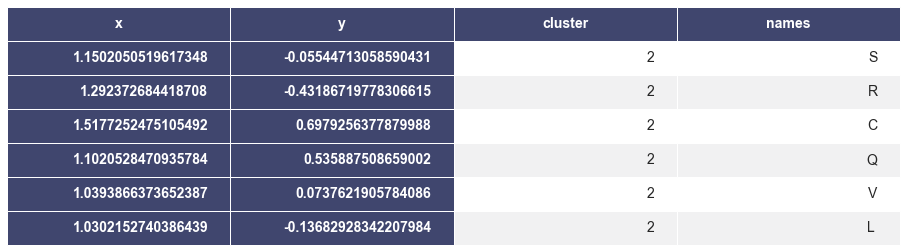

In [25]:
df = Kenyon_group_2


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)